In [53]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [54]:
import os # 모델 저장할 폴더가 있는지 여부와 폴더 생성
import numpy as np
import pandas as pd # read_csv, get_dummies, crosstab
import seaborn as sns # iris 데이터를 df로 가져오기
from sklearn import datasets # iris 데이터(X, y) 배열로 가져오기
from sklearn.preprocessing import LabelEncoder # 라벨 인코더
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras.metrics import Recall, Precision # compile 단계에서 사용
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint
import matplotlib.pyplot as plt

In [55]:
from sklearn import datasets
datasets.load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [56]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- 데이터 셋 생성 & 전처리
    X, y(라벨 인코딩-원핫인코딩) 분리 -> train셋과 test셋 분리(8:2)
- 모델 구성(입력 4 -> 출력 3, layer 5 : 4 > 64 > 128 > 50 > 30 > 3)
- 학습 과정 설정 (compile)
- 학습 (fit) : Earlystopping, ModelCheckpoint 추가
- 모델 평가(시각화, 현재 모델과 저장된 최고의 모델 평가, 교차표==혼동행렬)
- 모델 사용/저장

In [57]:
X = iris.iloc[:, :-1].values
y = iris.species.values
X.shape, y.shape

((150, 4), (150,))

In [58]:
le = LabelEncoder()
labeling_data = le.fit_transform(y)
labeling_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
one_hot_data = to_categorical(labeling_data)
one_hot_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    labeling_data,
                                                   test_size=0.2,
                                                   train_size=0.8,
                                                   stratify=y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [61]:
model = Sequential()
model.add(Input(4))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, 'relu'))
model.add(Dense(30, 'relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                320       
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                6450      
                                                                 
 dense_13 (Dense)            (None, 30)                1530      
                                                                 
 dense_14 (Dense)            (None, 3)                 93        
                                                                 
Total params: 16,713
Trainable params: 16,713
Non-trai

In [64]:
%%time
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) # Recall(), Precision()을 하려면 무조건 원핫인코딩으로 2차원으로 넣어야 함!
# on_epoch_end()함수가 epoch 수행 후 자동 호춣
class CustomHistory(Callback): # class 조회 : anaconda prompt / vscode 
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        '1epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch % 10 == 0:
            print('epoch : {}, loss : {:.4f}, acc : {:.4f}, val_loss : {:.4f}, val_acc : {:.4f}'\
                  .format(self.epoch,
                          logs.get('loss'),
                          logs.get('accuracy', '-'),
                          logs.get('val_loss', '-'),
                          logs.get('val_accuracy', '-')
            ))
model_save_folder = './model/'
import os
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder)
file = model_save_folder + 'iris-{epoch:03d}-loss{val_loss:.4f}-acc{val_accuracy:.4f}.h5'
customHistory = CustomHistory()
checkpoint = ModelCheckpoint(
                    filepath=file,
                    monitor='val_accuracy', # 모니터링 지표 : loss, val_loss, accuracy
                    save_best_only=True,
                    mode='max',
                    verbose=1) # log 출력 여부
earlyStopping = EarlyStopping(monitor='val_loss', patience=20)
# 학습
hist = model.fit(X_train, Y_train, epochs=100, batch_size=200,
                validation_split=0.1, # 학습셋의 10%는 검증셋으로
                verbose=0, # log 출력 막음(callback 함수에서 출력)
                callbacks=[earlyStopping, customHistory, checkpoint])


Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to ./model\iris-001-loss1.1009-acc0.3333.h5

Epoch 2: val_accuracy improved from 0.33333 to 0.41667, saving model to ./model\iris-002-loss1.0862-acc0.4167.h5

Epoch 3: val_accuracy did not improve from 0.41667

Epoch 4: val_accuracy did not improve from 0.41667

Epoch 5: val_accuracy did not improve from 0.41667

Epoch 6: val_accuracy did not improve from 0.41667

Epoch 7: val_accuracy did not improve from 0.41667

Epoch 8: val_accuracy did not improve from 0.41667

Epoch 9: val_accuracy improved from 0.41667 to 0.58333, saving model to ./model\iris-009-loss0.9719-acc0.5833.h5
epoch : 10, loss : 0.9072, acc : 0.6111, val_loss : 0.9257, val_acc : 0.5833

Epoch 10: val_accuracy did not improve from 0.58333

Epoch 11: val_accuracy improved from 0.58333 to 0.66667, saving model to ./model\iris-011-loss0.8833-acc0.6667.h5

Epoch 12: val_accuracy improved from 0.66667 to 0.75000, saving model to ./model\iris-012-loss0.8425-ac

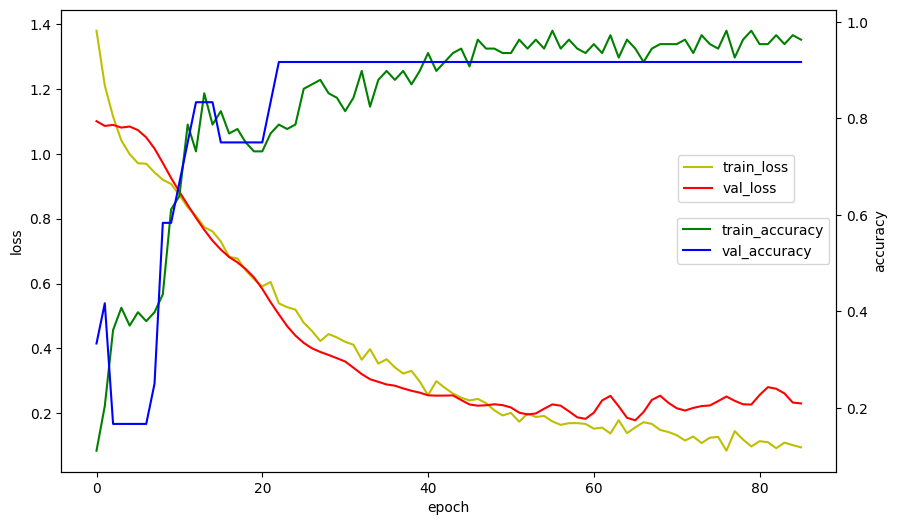

In [65]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [66]:
# 모델 평가(테스트셋으로)
loss_and_acc = model.evaluate(X_test, Y_test, batch_size=100, verbose=0)
print('loss :', loss_and_acc[0]) # loss_metrics의 구조는 학습 과정 설정 단계인 compile 단계의 매개변수를 참조
print('accuracy :', loss_and_acc[1])

loss : 0.037971269339323044
accuracy : 1.0


In [68]:
model1 = load_model('model/model.iris.h5')
loss_and_acc1 = model1.evaluate(X_test, Y_test, batch_size=100, verbose=0)
print('loss :', loss_and_acc1[0]) # loss_metrics의 구조는 학습 과정 설정 단계인 compile 단계의 매개변수를 참조
print('accuracy :', loss_and_acc1[1])

loss : 0.09316973388195038
accuracy : 1.0


In [69]:
from sklearn.metrics import confusion_matrix
y_hat = model.predict(X_test).argmax(axis=1)
y_hat.shape, Y_test.shape
confusion_matrix(Y_test, y_hat)

1/1 [==============================] - 0s 50ms/step


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [70]:
pd.crosstab(Y_test, y_hat, rownames=['실제'], colnames=['예측'])

예측,0,1,2
실제,,,
0,10,0,0
1,0,10,0
2,0,0,10


In [71]:
model.save('model.iris.h5')

In [72]:
H = model1.predict(X_test)
H

1/1 [==============================] - 0s 51ms/step


array([[2.5966417e-04, 1.2358468e-01, 8.7615567e-01],
       [1.0766309e-02, 9.3291515e-01, 5.6318469e-02],
       [9.7541997e-05, 6.3546509e-02, 9.3635595e-01],
       [1.1400541e-01, 8.6291230e-01, 2.3082232e-02],
       [8.2158640e-06, 1.1409907e-02, 9.8858196e-01],
       [2.0808512e-02, 9.3318933e-01, 4.6002187e-02],
       [9.9554271e-01, 4.2300657e-03, 2.2724934e-04],
       [9.8776859e-01, 1.1552001e-02, 6.7941158e-04],
       [7.3358961e-03, 7.6404440e-01, 2.2861972e-01],
       [7.4769741e-05, 4.3997582e-02, 9.5592761e-01],
       [7.7845664e-03, 9.0620506e-01, 8.6010285e-02],
       [9.8989642e-01, 9.6472669e-03, 4.5633520e-04],
       [4.0870667e-03, 7.8454137e-01, 2.1137163e-01],
       [1.0645865e-04, 5.4587889e-02, 9.4530559e-01],
       [9.8880136e-01, 1.0300162e-02, 8.9847186e-04],
       [3.0542925e-04, 1.5241395e-01, 8.4728068e-01],
       [1.1812483e-04, 7.7238701e-02, 9.2264318e-01],
       [1.5592913e-04, 1.2631957e-01, 8.7352455e-01],
       [5.1823547e-03, 7.053

In [73]:
H[0, H.argmax(axis=1)[0]] * 100

87.615567445755